In [1]:
import pandas as pd
import openpyxl
import seaborn as sns

data = pd.read_excel("./data/temperature.xlsx", index_col=1)

C:\Users\PC\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
data.columns = data.columns.str.replace(".", "-")

C:\Users\PC\AppData\Local\Temp\ipykernel_15596\2657562067.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(".", "-")


In [3]:

data = data.drop('Unnamed: 0', axis = 1).drop('Date', axis = 1)
data = data.apply(lambda x: x.mask(x < 0, 0))
data

,MTK1-T,MTK2-T,MTK3-T,MTK4-T,MTK5-T,D1-T,L-T,C-T,Env-T,MTK1-P,MTK2-P,MTK3-P,MTK4-P,MTK5-P,D1-P,L-P,C-P
Time,,,,,,,,,,,,,,,,,
14:19:36,28.446400,29.201581,29.608268,30.446304,30.153077,27.121625,29.363566,28.643133,23.553942,0.000000,29195.528139,30335.547987,15420.311615,30096.341969,0.000000,0.000000,24142.414396
14:19:56,28.446400,29.201581,29.608268,30.446304,30.153077,27.047405,29.363566,28.570260,23.553942,1735.364162,28829.265018,30095.457403,17007.675320,29959.837509,0.000000,0.000000,23321.634757
14:20:16,28.446400,29.201581,29.608268,30.446304,30.153077,26.973186,29.363566,28.497387,23.553942,4092.151404,28463.001896,29855.366819,18595.039025,29823.333048,1280.773792,148.375536,22500.855118
14:20:36,28.446400,29.201581,29.608268,30.446304,30.153077,26.885691,29.363566,28.415145,23.553942,6343.721296,28072.344257,29613.168966,20097.702553,29671.211915,2666.688632,304.471998,21721.731368
14:20:56,28.446400,29.201581,29.608268,30.446304,30.153077,26.798195,29.363566,28.332904,23.553942,8595.291189,27681.686619,29370.971112,21600.366081,29519.090783,4052.603471,460.568460,20942.607618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:47:56,28.383810,30.158430,30.733067,31.692876,31.521910,27.032579,30.099802,28.385694,24.008380,8629.234010,22372.511888,28065.479692,22998.654773,28143.382811,5063.148854,1431.128985,5375.043880
15:48:16,28.409920,30.305036,30.893954,31.816910,31.726999,27.210186,30.163782,28.591352,23.994695,9778.048380,22317.404570,28513.103148,23865.017325,28114.333875,6207.662288,2181.598745,5935.722376
15:48:36,28.433974,30.447917,31.049981,31.916685,31.916208,27.390331,30.225560,28.797997,23.981115,10948.214919,22225.468574,28995.563226,24813.902415,28101.301624,7406.006673,2817.936910,6442.661472


In [4]:
data.describe()

,MTK1-T,MTK2-T,MTK3-T,MTK4-T,MTK5-T,D1-T,L-T,C-T,Env-T,MTK1-P,MTK2-P,MTK3-P,MTK4-P,MTK5-P,D1-P,L-P,C-P
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,28.447831,29.208825,29.615319,30.471008,30.180333,27.014626,29.367671,28.576861,23.549680,21953.545666,29158.601765,30251.048952,26940.450834,30038.912824,12897.943567,2676.194190,23421.223171
std,0.325784,0.439427,0.553037,0.692875,0.869629,0.565370,0.570470,0.855980,0.698803,8320.349842,2371.833617,1825.132139,6067.905527,2630.867161,7896.339185,3066.971077,7633.072663
min,27.700348,28.200951,28.382801,28.796455,28.024176,26.154433,27.748478,27.229907,21.205825,0.000000,22009.417078,23818.379618,2039.369263,20011.020357,0.000000,0.000000,1730.752087
25%,28.244908,28.919245,29.217681,29.927879,29.500539,26.552701,28.929399,27.767714,23.417004,17606.383853,27943.336861,29135.533447,22734.980537,28964.753294,5659.305870,96.889090,19249.616443
50%,28.469113,29.201581,29.614102,30.478172,30.233064,26.866011,29.300242,28.436544,23.716357,24483.982308,29779.735632,30935.346471,29787.617944,30740.271125,12687.456206,979.317904,26039.509271
75%,28.647134,29.504657,29.996545,31.034345,30.871112,27.562213,29.842439,29.281998,24.053422,28596.806636,31081.649173,31814.125420,32080.697870,32215.644800,18439.934918,5683.092968,29674.859750
max,29.167629,30.731026,31.358356,32.105992,32.285700,28.092130,30.501810,30.212691,24.252087,30599.516217,31533.328101,31913.521554,32205.924091,32357.239833,27065.969850,11015.636375,30681.098565


In [7]:
dataTemp = data.filter(regex='-T')
dataTemp
dataTemp['Date'] = dataTemp.index
dataTemp['Date'] = dataTemp['Date'].apply(lambda x: (x - dataTemp['Date'].iloc[0]).total_seconds())
dataTemp
# use date as index
dataTemp = dataTemp.set_index('Date')
dataTemp

,MTK1-T,MTK2-T,MTK3-T,MTK4-T,MTK5-T,D1-T,L-T,C-T,Env-T
Time,,,,,,,,,
14:19:36,28.446400,29.201581,29.608268,30.446304,30.153077,27.121625,29.363566,28.643133,23.553942
14:19:56,28.446400,29.201581,29.608268,30.446304,30.153077,27.047405,29.363566,28.570260,23.553942
14:20:16,28.446400,29.201581,29.608268,30.446304,30.153077,26.973186,29.363566,28.497387,23.553942
14:20:36,28.446400,29.201581,29.608268,30.446304,30.153077,26.885691,29.363566,28.415145,23.553942
14:20:56,28.446400,29.201581,29.608268,30.446304,30.153077,26.798195,29.363566,28.332904,23.553942
...,...,...,...,...,...,...,...,...,...
15:47:56,28.383810,30.158430,30.733067,31.692876,31.521910,27.032579,30.099802,28.385694,24.008380
15:48:16,28.409920,30.305036,30.893954,31.816910,31.726999,27.210186,30.163782,28.591352,23.994695
15:48:36,28.433974,30.447917,31.049981,31.916685,31.916208,27.390331,30.225560,28.797997,23.981115


In [10]:
dataPressure = data.filter(regex='-P')
dataPressure['Date'] = dataPressure.index
dataPressure['Date'] = dataPressure['Date'].apply(lambda x: (x - dataPressure['Date'].iloc[0]).total_seconds())
dataPressure = dataPressure.set_index('Date')
dataPressure

,MTK1-P,MTK2-P,MTK3-P,MTK4-P,MTK5-P,D1-P,L-P,C-P
Time,,,,,,,,
14:19:36,0.000000,29195.528139,30335.547987,15420.311615,30096.341969,0.000000,0.000000,24142.414396
14:19:56,1735.364162,28829.265018,30095.457403,17007.675320,29959.837509,0.000000,0.000000,23321.634757
14:20:16,4092.151404,28463.001896,29855.366819,18595.039025,29823.333048,1280.773792,148.375536,22500.855118
14:20:36,6343.721296,28072.344257,29613.168966,20097.702553,29671.211915,2666.688632,304.471998,21721.731368
14:20:56,8595.291189,27681.686619,29370.971112,21600.366081,29519.090783,4052.603471,460.568460,20942.607618
...,...,...,...,...,...,...,...,...
15:47:56,8629.234010,22372.511888,28065.479692,22998.654773,28143.382811,5063.148854,1431.128985,5375.043880
15:48:16,9778.048380,22317.404570,28513.103148,23865.017325,28114.333875,6207.662288,2181.598745,5935.722376
15:48:36,10948.214919,22225.468574,28995.563226,24813.902415,28101.301624,7406.006673,2817.936910,6442.661472


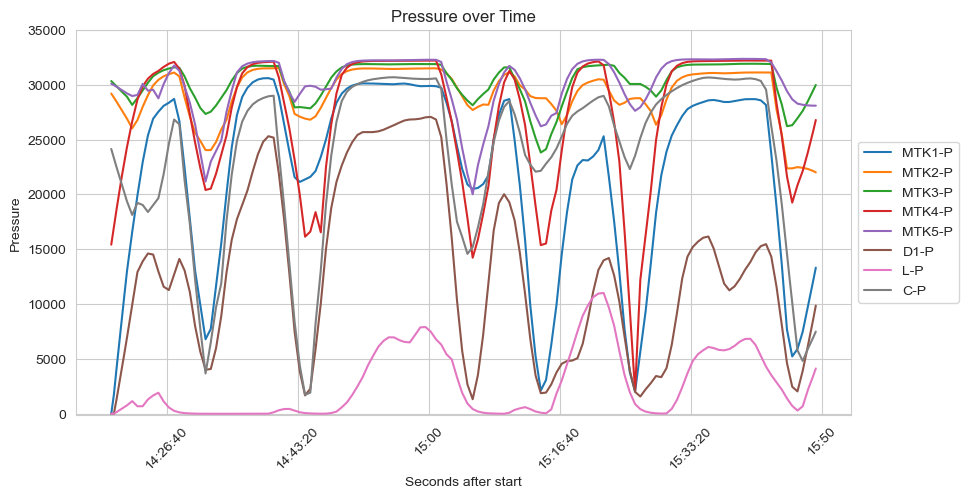

In [13]:
dataPressure.plot(style="-", figsize=(10, 5), ylim=(-100, 35000), title="Pressure over Time", xlabel="Seconds after start", ylabel="Pressure", rot=45, grid=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))




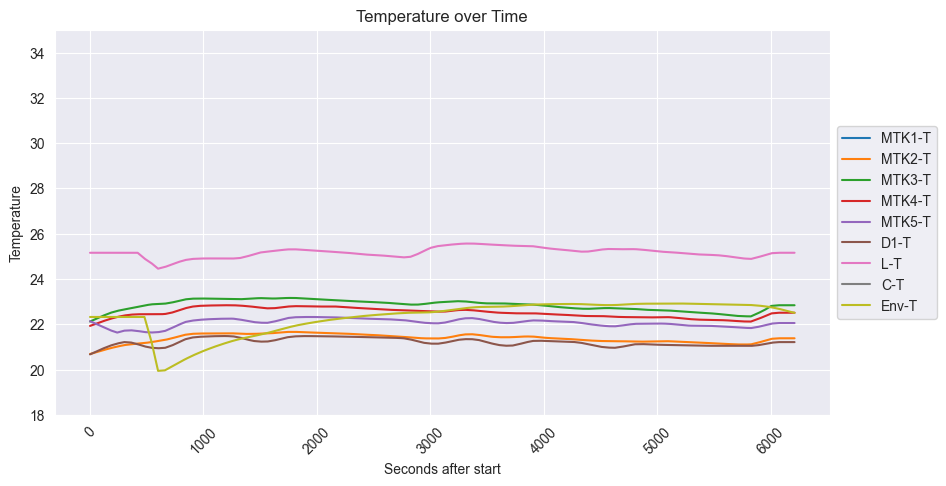

In [119]:
dataTemp.plot(style="-", figsize=(10, 5), ylim=(18, 35), title="Temperature over Time", xlabel="Seconds after start", ylabel="Temperature", rot=45, grid=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

